## Standard 1.5 IQR with box-wisker-plot visualization

"1.5 Interquartile Range" is a standard way to defined 'outlier' within a dataset.

The Inter Quartile Range is the range between the lower (or 1st)quartile and the upper (or 3rd) quartile.

This is what you see on a box an whisker plot. Everything in the box (with the median being the 'middle' line, is in that range.

A standard way of screening for outliners, is to exclude data that are outside of that box +- 1.5 * IQR (the inter quartile range). So not just 1.5x the box size, but that box plus and minus 1.5x the box size (so more like 4x the box size). This includes all but signficantly extreme outliers in terms of median and quartiles.

In [66]:
import numpy as np
import pandas as pd
from scipy.stats import t
import seaborn as sns
from scipy import stats

# Demo Data with Outliers


In [67]:
# Making random data with visible outliers

# Set the seed for reproducibility
np.random.seed(0)

# Use the t-distribution with 5 degrees of freedom to generate more outliers
data = t.rvs(5, size=100000)

# Create a DataFrame
df = pd.DataFrame(data, columns=['YOUR_TARGET_FIELD'])

# Print the first few rows of the DataFrame
print(df.head())

   YOUR_TARGET_FIELD
0           1.663706
1          -1.640095
2           1.075371
3           1.632332
4           0.784826


# IQR & 1.5 IQR calculations

In [68]:
TARGET = "YOUR_TARGET_FIELD"

In [69]:
df[TARGET].describe()

,YOUR_TARGET_FIELD
count,100000.000000
mean,0.006905
std,1.286519
min,-16.753782
25%,-0.723608
50%,0.004098
75%,0.727047
max,14.982629


In [70]:
# Print quartiles lower, upper

# see https://www.statology.org/remove-outliers-python/

# IQR or Inter Quartile Range
# is a standard, conservative, statical method
# for separating 'outliers' that are significally
# outside of the normal distribution
#
quartile_1 = df[TARGET].quantile(q=.25)
print("lower quartile is: ", quartile_1)
quartile_3 = df[TARGET].quantile(q=.75)
print("upper quartile is: ", quartile_3)

lower quartile is:  -0.7236075315520926
upper quartile is:  0.727046725090289


In [71]:
IQR = quartile_3 - quartile_1
print("IQR             = ", IQR)
size_irq_1_5 = IQR * 1.5
print("size of 1.5 IQR = ", size_irq_1_5)

IQR             =  1.4506542566423817
size of 1.5 IQR =  2.1759813849635723


In [72]:
lower_1_5_iqr_limit = quartile_1 - size_irq_1_5
print("lower range = ", lower_1_5_iqr_limit)

upper_1_5_iqr_limit = quartile_1 + size_irq_1_5
print("upper range = ", upper_1_5_iqr_limit)

lower range =  -2.8995889165156647
upper range =  1.4523738534114798


In [73]:
"""
now, separate what is inside or outside of this new
1.5 IQR (inter quartile range
"""

# variables for clarity
data = df[TARGET]
low = lower_1_5_iqr_limit
high = upper_1_5_iqr_limit

# filter out rows not in 1.5 IQR
iqr1_5_filter = data[(data > low) & (data < high)]

## view TARGET before and after filtering

<Axes: xlabel='YOUR_TARGET_FIELD'>

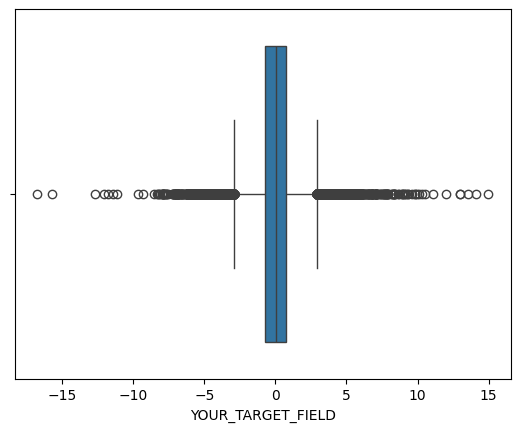

In [74]:
## view TARGET before filtering
sns.boxplot(x=df[TARGET])

<Axes: xlabel='YOUR_TARGET_FIELD'>

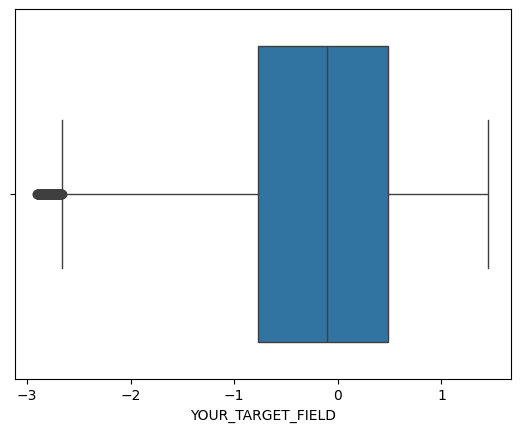

In [75]:
## view TARGET after filtering
sns.boxplot(x=iqr1_5_filter)

In [76]:
# Range
range = iqr1_5_filter.max() - iqr1_5_filter.min()
print("range = ", range)

range =  4.35170791091406


In [77]:
# Mean
mean = np.mean(iqr1_5_filter)
print("mean = ", mean)

mean =  -0.18938526722570476


In [78]:
# Median
median = np.median(iqr1_5_filter)
print("median = ", median)

median =  -0.10831480667761187


In [79]:
# Mode
mode = stats.mode(iqr1_5_filter)[0]
print("mode = ", mode)

mode =  -2.8994891350804126


In [80]:
iqr1_5_filter.shape

(88052,)

In [81]:
iqr1_5_filter.head(1)

,YOUR_TARGET_FIELD
1,-1.640095


 # TARGET IQR: compare

In [82]:
df[TARGET].describe()

,YOUR_TARGET_FIELD
count,100000.000000
mean,0.006905
std,1.286519
min,-16.753782
25%,-0.723608
50%,0.004098
75%,0.727047
max,14.982629


In [83]:
iqr1_5_filter.describe()

,YOUR_TARGET_FIELD
count,88052.000000
mean,-0.189385
std,0.905967
min,-2.899489
25%,-0.774013
50%,-0.108315
75%,0.487689
max,1.452219
